<a href="https://colab.research.google.com/github/taskswithcode/probability_for_ml_notebooks/blob/main/MLEssence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook for What is a neural net really learning?**

This is a notebook link for the video [What is a neural net really learning?](https://youtube.com/shorts/PTDB_JRxWTc?feature=share)

#### Introduction
  When we feed in an input image of a cat to a neural net and the model outputs a 1 for cat and 0 for not cat, the model essentially is transforming a three dimensional input (width, height, color) into one number. *This is done by a sequence of transformations along with reduction in dimension of the original input*. As the image goes through the layers of a neural net, the model learns to extract features that help in identifying the input.

  **All neural nets learn transformations, to map input to desired output**. These transformations are learned from the training data. Two kinds of transformations are learned.
  - **linear transformation**
    - If we feed a set of 1-dimensional points to a linear transformation, the output will be a line.  If we feed in a 2-d points, the transformed output will  be a plane.
    - If we feed in 1-D points representing three lines, the distances between their end points may change, but the proportions remain the same.
    - the origin of the lines remain the same after the transformation.
    - from a geometric perspective ***linear transformations scale, rotate,shear, reflect the input or just preserve the input as is***.

  - **non linear transformation**
    - Nonlinear transformations can create a variety of complex effects that aren't possible with linear transformations. They do not necessarily preserve lines, planes, the origin, or the proportions of shapes. From a visual standpoint, here are a few types of operations that a nonlinear transformation might perform:

      - Warping: Distorting the space in a way that curves lines and changes shapes. This could include bending, twisting, or stretching the space in a non-uniform way.

      - Folding: "Folding" the space over onto itself, so that different points in the input space map to the same point in the output space.

      - Tearing or Cutting: Creating discontinuities in the space, where points that were close in the input space are far apart in the output space.

      - Expanding or Contracting: Changing distances in the space in a non-uniform way, such that some regions of the space are expanded while others are contracted.

    - These are just a few examples. The specific effects of a nonlinear transformation depend on the mathematical form of the transformation. As a result, nonlinear transformations can create a wide variety of patterns and shapes that are not possible with linear transformations.

  This notebook illustrates both these transformations.

##### Linear and non linear transformation of 1-dimensional input

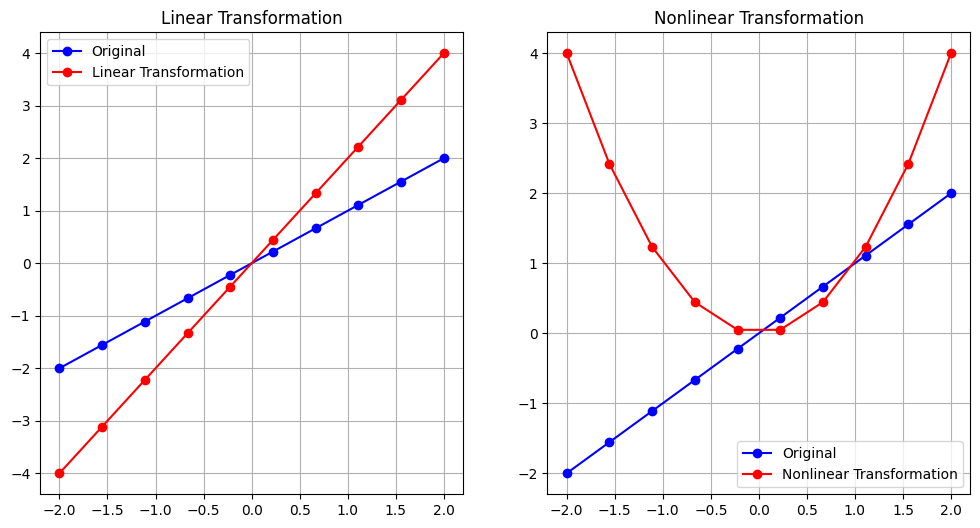

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of input values
x = np.linspace(-2, 2, 10)

# Define a linear transformation (multiply by 2)
y_linear = 2 * x

# Define a nonlinear transformation (square function)
y_nonlinear = x ** 2

# Plot the original values and the transformed values
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(x, x, 'bo-', label='Original')
ax[0].plot(x, y_linear, 'ro-', label='Linear Transformation')
ax[0].set_title("Linear Transformation")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(x, x, 'bo-', label='Original')
ax[1].plot(x, y_nonlinear, 'ro-', label='Nonlinear Transformation')
ax[1].set_title("Nonlinear Transformation")
ax[1].legend()
ax[1].grid(True)

plt.show()


*The left plot shows a linear transformation of 10 points and the right figure shows non-linear transformation of same 10 points. The blue line is just the line y = x. It is intended to show where the input x values would land if no transformation was done to it. It is shown purely as a reference.*

##### Linear transformation of 2-dimensional input

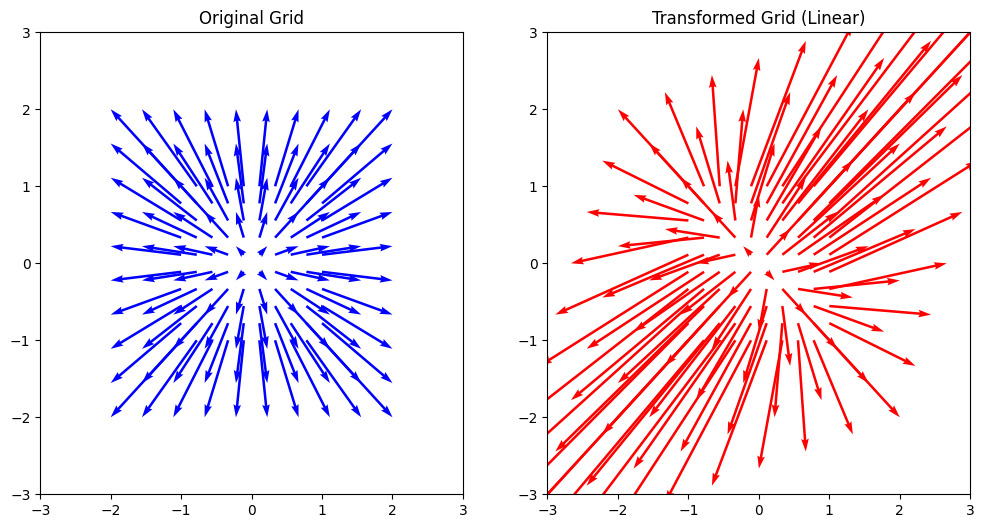

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a grid of points
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
X, Y = np.meshgrid(x, y)
U = X.copy()
V = Y.copy()

# Define a linear transformation (2x2 matrix)
A = np.array([[2, 1], [1, 2]])

# Apply the linear transformation to each point in the grid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vector = np.array([X[i, j], Y[i, j]])
        result = A @ vector
        U[i, j], V[i, j] = result[0], result[1]

# Plot the original grid and the transformed grid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].quiver(X, Y, X, Y, color='blue', angles='xy', scale_units='xy', scale=1)
ax[0].set_title("Original Grid")
ax[0].set_xlim([-3, 3])
ax[0].set_ylim([-3, 3])

ax[1].quiver(X, Y, U, V, color='red', angles='xy', scale_units='xy', scale=1)
ax[1].set_title("Transformed Grid (Linear)")
ax[1].set_xlim([-3, 3])
ax[1].set_ylim([-3, 3])

plt.show()


*The left plot is the original two dimensional input. The right plot is the linear transformation of input. Note lines remain lines after transformation*

##### Non linear transformation of 2-dimensional input

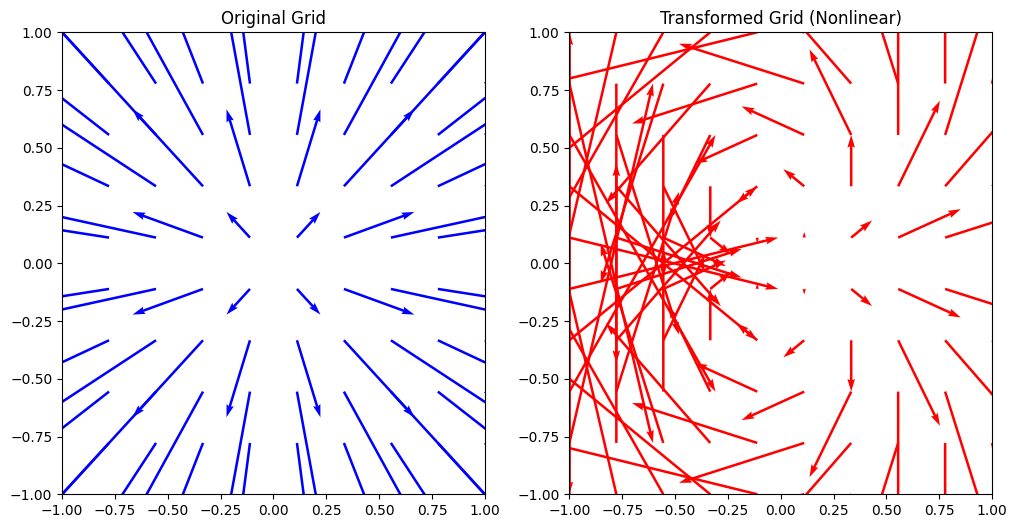

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a nonlinear transformation
def f(x, y):
    return x**2 - y**2, 2*x*y

# Apply the nonlinear transformation to each point in the grid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        result = f(X[i, j], Y[i, j])
        U[i, j], V[i, j] = result[0], result[1]

# Plot the original grid and the transformed grid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].quiver(X, Y, X, Y, color='blue', angles='xy', scale_units='xy', scale=1)
ax[0].set_title("Original Grid")
ax[0].set_xlim([-1, 1])
ax[0].set_ylim([-1, 1])

ax[1].quiver(X, Y, U, V, color='red', angles='xy', scale_units='xy', scale=1)
ax[1].set_title("Transformed Grid (Nonlinear)")
ax[1].set_xlim([-1, 1])
ax[1].set_ylim([-1, 1])

plt.show()


*The left plot is the original two dimensional input. The right plot is the non-linear transformation of input. Note lines that were initially non-intersecting, start to intersect after the transformation.*

##### Different linear transformations of 1-dimensional input

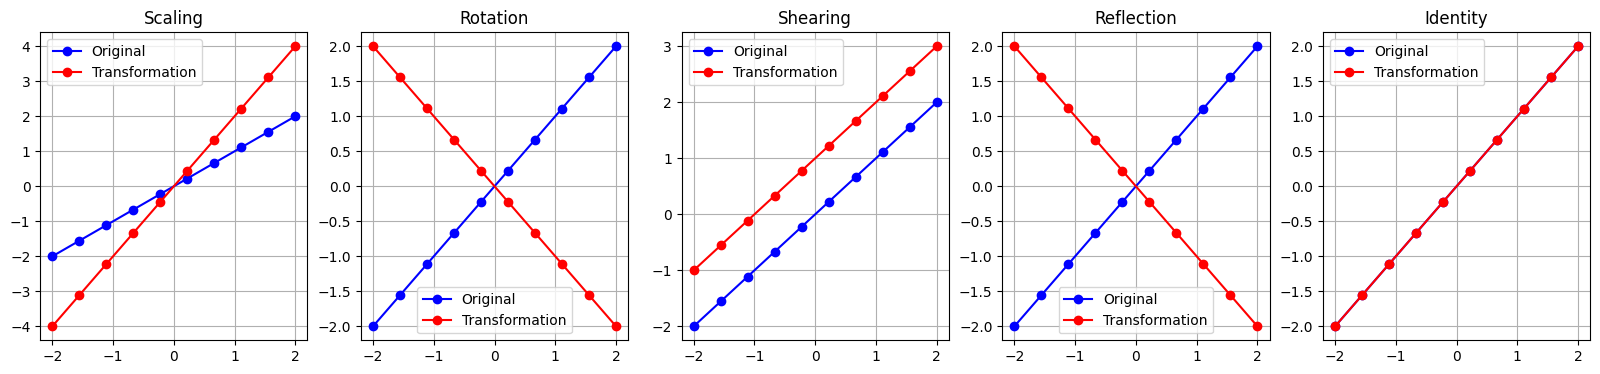

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of input values
x = np.linspace(-2, 2, 10)

# Define the transformations
scaling = 2 * x
rotation = -x  # For 1D, rotation is equivalent to reflection
shearing = x + 1  # In 1D, shearing is equivalent to translation
reflection = -x
identity = x

transformations = [scaling, rotation, shearing, reflection, identity]
titles = ["Scaling", "Rotation", "Shearing", "Reflection", "Identity"]

fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for ax, transformation, title in zip(axs, transformations, titles):
    # Plot the original values and the transformed values
    ax.plot(x, x, 'bo-', label='Original')
    ax.plot(x, transformation, 'ro-', label='Transformation')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

plt.show()


*The figures above are different linear transformations of 1-dimensional input. The blue dots are the input points, and the red dots are the transformed points.*

##### Different linear transformations of 2-dimensional input

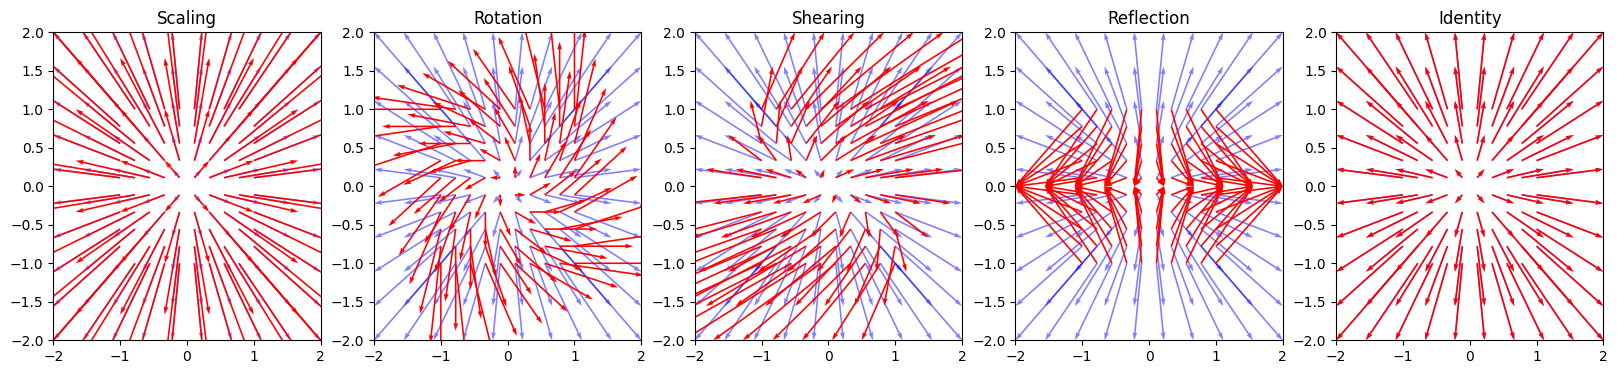

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Define a grid of points
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
X, Y = np.meshgrid(x, y)

# Define the transformation matrices
scaling_matrix = np.array([[2, 0], [0, 2]])
rotation_matrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], [np.sin(np.pi/4), np.cos(np.pi/4)]])
shearing_matrix = np.array([[1, 1.5], [0, 1]])
reflection_matrix = np.array([[1, 0], [0, -1]])
identity_matrix = np.array([[1, 0], [0, 1]])

matrices = [scaling_matrix, rotation_matrix, shearing_matrix, reflection_matrix, identity_matrix]
titles = ["Scaling", "Rotation", "Shearing", "Reflection", "Identity"]

fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for ax, matrix, title in zip(axs, matrices, titles):
    U = X.copy()
    V = Y.copy()

    # Apply the transformation to each point in the grid
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            vector = np.array([X[i, j], Y[i, j]])
            result = matrix @ vector
            U[i, j], V[i, j] = result[0], result[1]

    # Plot the original grid and the transformed grid
    ax.quiver(X, Y, X, Y, color='blue', angles='xy', scale_units='xy', scale=1, alpha=0.5)
    ax.quiver(X, Y, U, V, color='red', angles='xy', scale_units='xy', scale=1)
    ax.set_title(title)
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])

plt.show()


*The figures above are different linear transformations of 2-dimensional input. The blue lines are the input points, and the red lines are the transformed points.*

##### Different non-linear transformations of 1-dimensional input

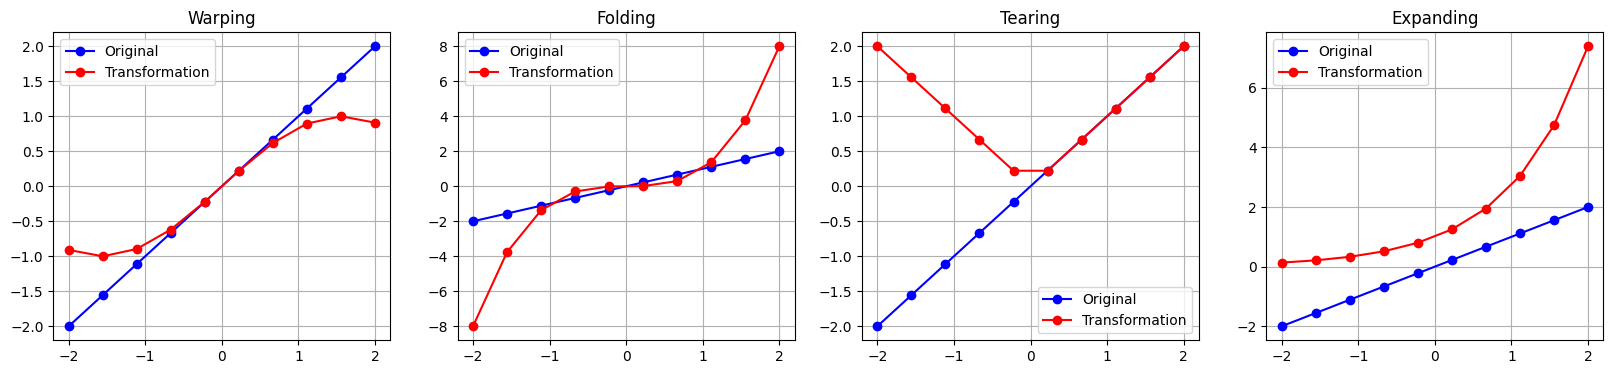

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of input values
x = np.linspace(-2, 2, 10)

# Define the nonlinear transformations
warping = np.sin(x)
folding = x**3
tearing = np.abs(x)
expanding = np.exp(x)

transformations = [warping, folding, tearing, expanding]
titles = ["Warping", "Folding", "Tearing", "Expanding"]

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for ax, transformation, title in zip(axs, transformations, titles):
    # Plot the original values and the transformed values
    ax.plot(x, x, 'bo-', label='Original')
    ax.plot(x, transformation, 'ro-', label='Transformation')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

plt.show()


*The figures above are different non-linear transformations of 1-dimensional input. The blue dots are the input points, and the red dots are the transformed points.*

##### Different non-linear transformations of 2-dimensional input

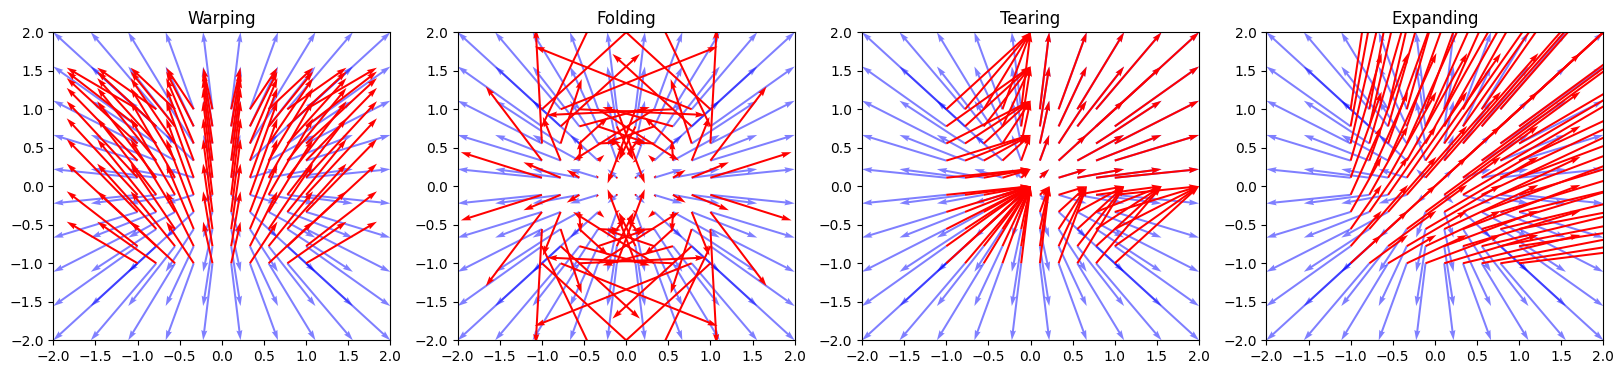

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a nonlinear transformation for each operation
def warping(x, y):
    return np.sin(x), np.cos(y)

def folding(x, y):
    return x**3 - 3*x*y**2, 3*x**2*y - y**3

def tearing(x, y):
    return np.abs(x), np.abs(y)

def expanding(x, y):
    return np.exp(x), np.exp(y)

transformations = [warping, folding, tearing, expanding]
titles = ["Warping", "Folding", "Tearing", "Expanding"]

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for ax, transformation, title in zip(axs, transformations, titles):
    U = X.copy()
    V = Y.copy()

    # Apply the transformation to each point in the grid
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            result = transformation(X[i, j], Y[i, j])
            U[i, j], V[i, j] = result[0], result[1]

    # Plot the original grid and the transformed grid
    ax.quiver(X, Y, X, Y, color='blue', angles='xy', scale_units='xy', scale=1, alpha=0.5)
    ax.quiver(X, Y, U, V, color='red', angles='xy', scale_units='xy', scale=1)
    ax.set_title(title)
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])

plt.show()


*The figures above are different non-linear transformations of 2-dimensional input. The blue lines are the input points, and the red lines are the transformed points.*

##### Different non-linear transformations used in ML. They are typically called activation functions

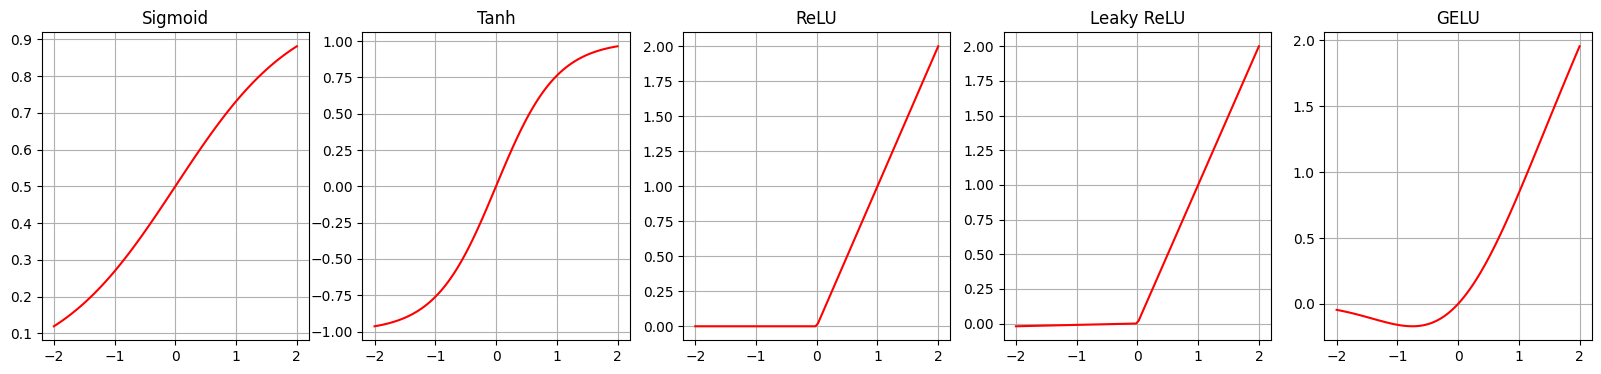

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, x * alpha)

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

# Define a range of input values
x = np.linspace(-2, 2, 100)

# Calculate the outputs
activations = [sigmoid(x), tanh(x), relu(x), leaky_relu(x), gelu(x)]
titles = ["Sigmoid", "Tanh", "ReLU", "Leaky ReLU", "GELU"]

# Plot the outputs
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for ax, activation, title in zip(axs, activations, titles):
    ax.plot(x, activation, 'r-')
    ax.set_title(title)
    ax.grid(True)

plt.show()


*The various activation functions used in ML. These are the popular functions used to non-linearly transform the input. Note the y=x line is not shown in these figures*

**Sigmoid:** The sigmoid function smoothly varies from 0 to 1, and is often used for binary classification problems.

**Tanh:** The tanh function is similar to the sigmoid function but varies from -1 to 1, providing outputs that are centered around 0.

**ReLU (Rectified Linear Unit):** The ReLU function is 0 for negative inputs and equal to the input for positive inputs. It introduces nonlinearity without affecting positive inputs, and is commonly used in many types of neural networks due to its computational efficiency.

**Leaky ReLU:** The Leaky ReLU function is similar to the ReLU function, but allows small negative values when the input is less than zero. This can help to mitigate the "dying ReLU" problem, where neurons can become stuck in the "off" position.

**GELU (Gaussian Error Linear Unit):** The GELU function is a newer activation function that has been found to perform well in practice, particularly in transformer models. It is smooth and differentiable, and introduces nonlinearity in a way that is designed to emulate the cumulative distribution function of a Gaussian distribution.

As you can see, each of these activation functions introduces nonlinearity in a different way, and can have different effects on the learning dynamics of a neural network.

##### Couple more non-linear transformations used in ML. They are typically called activation functions

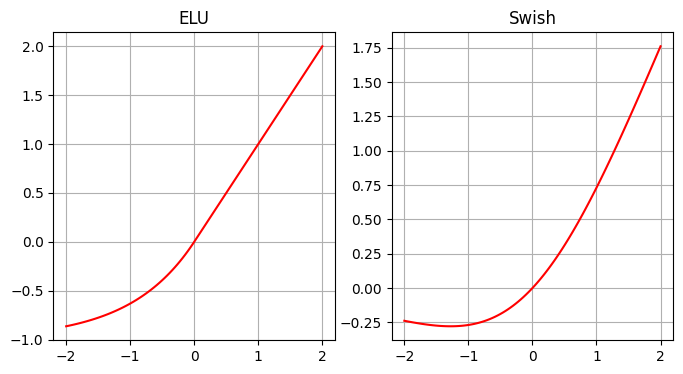

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the additional activation functions
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x / (1 + np.exp(-x))

# Calculate the outputs
activations = [elu(x), swish(x)]
titles = ["ELU", "Swish"]

# Plot the outputs
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for ax, activation, title in zip(axs, activations, titles):
    ax.plot(x, activation, 'r-')
    ax.set_title(title)
    ax.grid(True)

plt.show()


*A couple more activation functions used in ML. These are the popular functions used to non-linearly transform the input. Note the y=x line is not shown in these figures*

**ELU (Exponential Linear Unit)**: The ELU function is similar to the ReLU function, but allows small negative values when the input is less than zero. This can help to push the mean activations towards zero.

**Swish (also known as SiLU):** The Swish function is a newer activation function that was found by Google to perform well in deep networks. It is smooth and non-monotonic (meaning it doesn't exclusively increase or decrease).

The choice of activation function can have a significant impact on the learning dynamics of a neural network.

#### Additional notes
- [Andrej Karpahy's interactive demo for toy 1D regression model](https://cs.stanford.edu/people/karpathy/convnetjs/demo/regression.html) This interactive demo helps visualize how combinations of linear and non-linear transformations transform 1-d input.
- Any layer of any type in a neural net model could be considered to be either a linear or non-linear transformation. For instance
  - consider the convolution operator used in convolutional neural networks. Convolution operator which is a feature extractor, is a linear transformation of input. On the other hand max pooling operation is a non linear transformation
  - transformers, a popular architecture that is used for a wide range of tasks is made up of both linear and non linear transformations of input
